In [1]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import io
from nltk.tokenize import RegexpTokenizer, sent_tokenize, word_tokenize
import fitz

In [2]:
def extractTextFromPdf(path):
    extractedText = ''
    pdf_document = fitz.open(path)
    for page_number in range(pdf_document.page_count):
        page = pdf_document[page_number]
        extractedText += page.get_text()
    pdf_document.close()
    #print(text_2021)
    return extractedText

In [3]:
#extractedTextList_2021 = []
extractedTextList_2022 = []

#extractedTextList_2021.append(extractTextFromPdf(r'2021.pdf'))
extractedTextList_2022.append(extractTextFromPdf(r'2022.pdf'))

#dataTuples_2021 = list(zip(extractedTextList_2021))
dataTuples_2022 = list(zip(extractedTextList_2022))

#outputAnalysisDF_2021 = pd.DataFrame(dataTuples_2021, columns=['ExtractedTEXT'])
outputAnalysisDF_2022 = pd.DataFrame(dataTuples_2022, columns=['ExtractedTEXT'])

outputAnalysisDF_2022.head()

,ExtractedTEXT
0,Prime Minister's Office\nEnglish Rendering of ...


In [4]:
outputAnalysisDF_2022.iloc[0,0]

'Prime Minister\'s Office\nEnglish Rendering of Prime Minister\'s address from\nthe ramparts of Red Fort on  76th Independence Day\nPosted On: 15 AUG 2022 12:19PM by PIB Delhi\nBest wishes to my dear countrymen on the momentous occasion of completion of 75 years of Independence.\nMany congratulations to all! It is heartening to see our tricolor being unfurled with pride, honor and glory, not\nonly in all the corners of India, but also worldwide by Indians who love their country immensely. I extend my\nheartiest congratulations to all the people spread across the globe who love India. My heartfelt greetings to all\nmy dear Indians on this Amrit Mahotsav festival of celebrating our freedom. This is a day of historic\nimportance. This is an auspicious occasion to step forward on a new path, with a new resolution and a new\nstrength.\nIn the pursuit of Independence, the entire period of slavery was spent in struggle. No part of India or any time\nperiod remained untouched by the freedom st

#### Converted to Lower

In [5]:
outputAnalysisDF_2022.ExtractedTEXT=outputAnalysisDF_2022.ExtractedTEXT.str.lower()

In [6]:
outputAnalysisDF_2022.iloc[0,0]

'prime minister\'s office\nenglish rendering of prime minister\'s address from\nthe ramparts of red fort on  76th independence day\nposted on: 15 aug 2022 12:19pm by pib delhi\nbest wishes to my dear countrymen on the momentous occasion of completion of 75 years of independence.\nmany congratulations to all! it is heartening to see our tricolor being unfurled with pride, honor and glory, not\nonly in all the corners of india, but also worldwide by indians who love their country immensely. i extend my\nheartiest congratulations to all the people spread across the globe who love india. my heartfelt greetings to all\nmy dear indians on this amrit mahotsav festival of celebrating our freedom. this is a day of historic\nimportance. this is an auspicious occasion to step forward on a new path, with a new resolution and a new\nstrength.\nin the pursuit of independence, the entire period of slavery was spent in struggle. no part of india or any time\nperiod remained untouched by the freedom st

### Remove punctuation

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
def remove_punctuation(text):
    text_nopunt="".join([c 
                         for c in text
                         if c not in string.punctuation])
    return text_nopunt

In [9]:
outputAnalysisDF_2022['ExtractedTEXT']=outputAnalysisDF_2022['ExtractedTEXT'].apply(lambda x : remove_punctuation(x))

In [10]:
outputAnalysisDF_2022.iloc[0,0]

'prime ministers office\nenglish rendering of prime ministers address from\nthe ramparts of red fort on  76th independence day\nposted on 15 aug 2022 1219pm by pib delhi\nbest wishes to my dear countrymen on the momentous occasion of completion of 75 years of independence\nmany congratulations to all it is heartening to see our tricolor being unfurled with pride honor and glory not\nonly in all the corners of india but also worldwide by indians who love their country immensely i extend my\nheartiest congratulations to all the people spread across the globe who love india my heartfelt greetings to all\nmy dear indians on this amrit mahotsav festival of celebrating our freedom this is a day of historic\nimportance this is an auspicious occasion to step forward on a new path with a new resolution and a new\nstrength\nin the pursuit of independence the entire period of slavery was spent in struggle no part of india or any time\nperiod remained untouched by the freedom struggle against seve

In [11]:
outputAnalysisDF_2022.ExtractedTEXT=outputAnalysisDF_2022.ExtractedTEXT.str.replace(r'space','',case=False)
outputAnalysisDF_2022.iloc[0,0]

'prime ministers office\nenglish rendering of prime ministers address from\nthe ramparts of red fort on  76th independence day\nposted on 15 aug 2022 1219pm by pib delhi\nbest wishes to my dear countrymen on the momentous occasion of completion of 75 years of independence\nmany congratulations to all it is heartening to see our tricolor being unfurled with pride honor and glory not\nonly in all the corners of india but also worldwide by indians who love their country immensely i extend my\nheartiest congratulations to all the people spread across the globe who love india my heartfelt greetings to all\nmy dear indians on this amrit mahotsav festival of celebrating our freedom this is a day of historic\nimportance this is an auspicious occasion to step forward on a new path with a new resolution and a new\nstrength\nin the pursuit of independence the entire period of slavery was spent in struggle no part of india or any time\nperiod remained untouched by the freedom struggle against seve

### Remove Number

In [12]:
outputAnalysisDF_2022.ExtractedTEXT=outputAnalysisDF_2022.ExtractedTEXT.str.replace('\d+', '')

In [13]:
outputAnalysisDF_2022.iloc[0,0]

'prime ministers office\nenglish rendering of prime ministers address from\nthe ramparts of red fort on  th independence day\nposted on  aug  pm by pib delhi\nbest wishes to my dear countrymen on the momentous occasion of completion of  years of independence\nmany congratulations to all it is heartening to see our tricolor being unfurled with pride honor and glory not\nonly in all the corners of india but also worldwide by indians who love their country immensely i extend my\nheartiest congratulations to all the people spread across the globe who love india my heartfelt greetings to all\nmy dear indians on this amrit mahotsav festival of celebrating our freedom this is a day of historic\nimportance this is an auspicious occasion to step forward on a new path with a new resolution and a new\nstrength\nin the pursuit of independence the entire period of slavery was spent in struggle no part of india or any time\nperiod remained untouched by the freedom struggle against several centuries 

#### Removing Stop Words

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pallavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [16]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
outputAnalysisDF_2022.iloc[0,0]

'prime ministers office\nenglish rendering of prime ministers address from\nthe ramparts of red fort on  th independence day\nposted on  aug  pm by pib delhi\nbest wishes to my dear countrymen on the momentous occasion of completion of  years of independence\nmany congratulations to all it is heartening to see our tricolor being unfurled with pride honor and glory not\nonly in all the corners of india but also worldwide by indians who love their country immensely i extend my\nheartiest congratulations to all the people spread across the globe who love india my heartfelt greetings to all\nmy dear indians on this amrit mahotsav festival of celebrating our freedom this is a day of historic\nimportance this is an auspicious occasion to step forward on a new path with a new resolution and a new\nstrength\nin the pursuit of independence the entire period of slavery was spent in struggle no part of india or any time\nperiod remained untouched by the freedom struggle against several centuries 

In [18]:
outputAnalysisDF_2022['ExtractedTEXT'] = outputAnalysisDF_2022['ExtractedTEXT'].apply(lambda x: ' '.join([word 
                                                      for word in x.split() 
                                                      if word not in (stop)]))

In [19]:
outputAnalysisDF_2022.iloc[0,0]

'prime ministers office english rendering prime ministers address ramparts red fort th independence day posted aug pm pib delhi best wishes dear countrymen momentous occasion completion years independence many congratulations heartening see tricolor unfurled pride honor glory corners india also worldwide indians love country immensely extend heartiest congratulations people spread across globe love india heartfelt greetings dear indians amrit mahotsav festival celebrating freedom day historic importance auspicious occasion step forward new path new resolution new strength pursuit independence entire period slavery spent struggle part india time period remained untouched freedom struggle several centuries slavery marked people sacrificing facing torutre making supreme sacrifice today opportunity us countrymen bow salute brave hearts legends every sacrifice made every great soul opportunity also solemnly acknowledge debt pledge fulfil dreams earliest deep resolve countrymen deeply indebt

## Lemmatization

In [20]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # word tokenizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pallavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
def lemmatize_text(ExtractedTEXT):
    return [lemmatizer.lemmatize(w,"v") ## v = verb  
            for w in w_tokenizer.tokenize(ExtractedTEXT)]  # word tokenizer

In [22]:
outputAnalysisDF_2022['ExtractedTEXT'] = outputAnalysisDF_2022.ExtractedTEXT.apply(lambda x :' '.join(lemmatize_text(x)))
outputAnalysisDF_2022.iloc[0,0]

'prime minister office english render prime minister address ramparts red fort th independence day post aug pm pib delhi best wish dear countrymen momentous occasion completion years independence many congratulations hearten see tricolor unfurl pride honor glory corner india also worldwide indians love country immensely extend heartiest congratulations people spread across globe love india heartfelt greet dear indians amrit mahotsav festival celebrate freedom day historic importance auspicious occasion step forward new path new resolution new strength pursuit independence entire period slavery spend struggle part india time period remain untouched freedom struggle several centuries slavery mark people sacrifice face torutre make supreme sacrifice today opportunity us countrymen bow salute brave hearts legends every sacrifice make every great soul opportunity also solemnly acknowledge debt pledge fulfil dream earliest deep resolve countrymen deeply indebted pujya bapu netaji subhash cha

#### Strip extra whitespace

In [23]:
outputAnalysisDF_2022.iloc[0,0]

'prime minister office english render prime minister address ramparts red fort th independence day post aug pm pib delhi best wish dear countrymen momentous occasion completion years independence many congratulations hearten see tricolor unfurl pride honor glory corner india also worldwide indians love country immensely extend heartiest congratulations people spread across globe love india heartfelt greet dear indians amrit mahotsav festival celebrate freedom day historic importance auspicious occasion step forward new path new resolution new strength pursuit independence entire period slavery spend struggle part india time period remain untouched freedom struggle several centuries slavery mark people sacrifice face torutre make supreme sacrifice today opportunity us countrymen bow salute brave hearts legends every sacrifice make every great soul opportunity also solemnly acknowledge debt pledge fulfil dream earliest deep resolve countrymen deeply indebted pujya bapu netaji subhash cha

In [24]:
outputAnalysisDF_2022['ExtractedTEXT'] = (outputAnalysisDF_2022['ExtractedTEXT'].astype("str").str.rstrip())
outputAnalysisDF_2022.iloc[0,0]

'prime minister office english render prime minister address ramparts red fort th independence day post aug pm pib delhi best wish dear countrymen momentous occasion completion years independence many congratulations hearten see tricolor unfurl pride honor glory corner india also worldwide indians love country immensely extend heartiest congratulations people spread across globe love india heartfelt greet dear indians amrit mahotsav festival celebrate freedom day historic importance auspicious occasion step forward new path new resolution new strength pursuit independence entire period slavery spend struggle part india time period remain untouched freedom struggle several centuries slavery mark people sacrifice face torutre make supreme sacrifice today opportunity us countrymen bow salute brave hearts legends every sacrifice make every great soul opportunity also solemnly acknowledge debt pledge fulfil dream earliest deep resolve countrymen deeply indebted pujya bapu netaji subhash cha

### Document-Term Matrix

In [25]:
outputAnalysisDF_2022.head()

,ExtractedTEXT
0,prime minister office english render prime min...


In [26]:
outputAnalysisDF_2022.ExtractedTEXT[0]

'prime minister office english render prime minister address ramparts red fort th independence day post aug pm pib delhi best wish dear countrymen momentous occasion completion years independence many congratulations hearten see tricolor unfurl pride honor glory corner india also worldwide indians love country immensely extend heartiest congratulations people spread across globe love india heartfelt greet dear indians amrit mahotsav festival celebrate freedom day historic importance auspicious occasion step forward new path new resolution new strength pursuit independence entire period slavery spend struggle part india time period remain untouched freedom struggle several centuries slavery mark people sacrifice face torutre make supreme sacrifice today opportunity us countrymen bow salute brave hearts legends every sacrifice make every great soul opportunity also solemnly acknowledge debt pledge fulfil dream earliest deep resolve countrymen deeply indebted pujya bapu netaji subhash cha

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud

In [28]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # dtm = Term
outputAnalysisDF_2022_cv = cv.fit_transform(outputAnalysisDF_2022.ExtractedTEXT)  # Term & Count
outputAnalysisDF_2022_dtm = pd.DataFrame(outputAnalysisDF_2022_cv.toarray(), columns=cv.get_feature_names_out()) # document term matrix

# One of the required inputs is a term-document matrix
tdm =outputAnalysisDF_2022_dtm.transpose()
tdm

,0
aadhaar,1
aatmanirbhar,2
abhorrence,1
able,6
abort,1
...,...
yoga,2
younger,1
youngsters,1
youth,8


In [29]:
tdm['freq'] = tdm.sum(axis=1)

tdm.head()

,0,freq
aadhaar,1,1
aatmanirbhar,2,2
abhorrence,1,1
able,6,6
abort,1,1


In [30]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,freq
0,aadhaar,1,1
1,aatmanirbhar,2,2
2,abhorrence,1,1
3,able,6,6
4,abort,1,1


In [31]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

,Word,freq
257,country,75
624,india,68
1345,world,47
1226,today,46
258,countrymen,41
...,...,...
572,highlight,1
573,himalayan,1
575,hindi,1
576,historic,1


In [32]:
tdm1.head(10)

,Word,freq
257,country,75
624,india,68
1345,world,47
1226,today,46
258,countrymen,41
1358,years,40
872,people,40
817,new,28
281,dear,27
353,dream,26


In [33]:
w = tdm1[tdm1['freq'] >30]
w

,Word,freq
257,country,75
624,india,68
1345,world,47
1226,today,46
258,countrymen,41
1358,years,40
872,people,40


##### Barplot

In [34]:
import seaborn as sns

<Axes: xlabel='Word', ylabel='freq'>

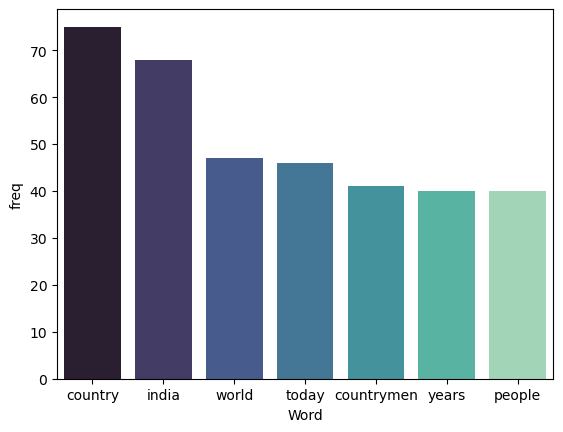

In [35]:
sns.barplot(x='Word',y='freq',
            palette='mako',
            data=w)

### Word Cloud

In [36]:
ExtractedTEXT = " ".join(review for review in outputAnalysisDF_2022.ExtractedTEXT)
print ("There are {} words in the combination of all review.".format(len(ExtractedTEXT)))

There are 28998 words in the combination of all review.


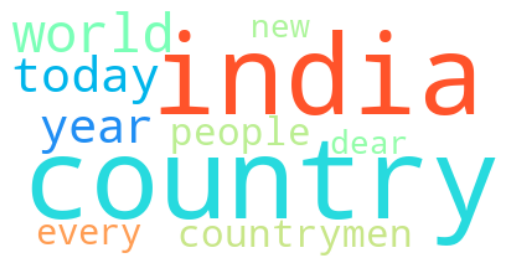

In [37]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      contour_color='#023075',contour_width=3,colormap='rainbow',
                      collocations=False,
                       max_words=10).generate(ExtractedTEXT)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Cloud Wordcloud

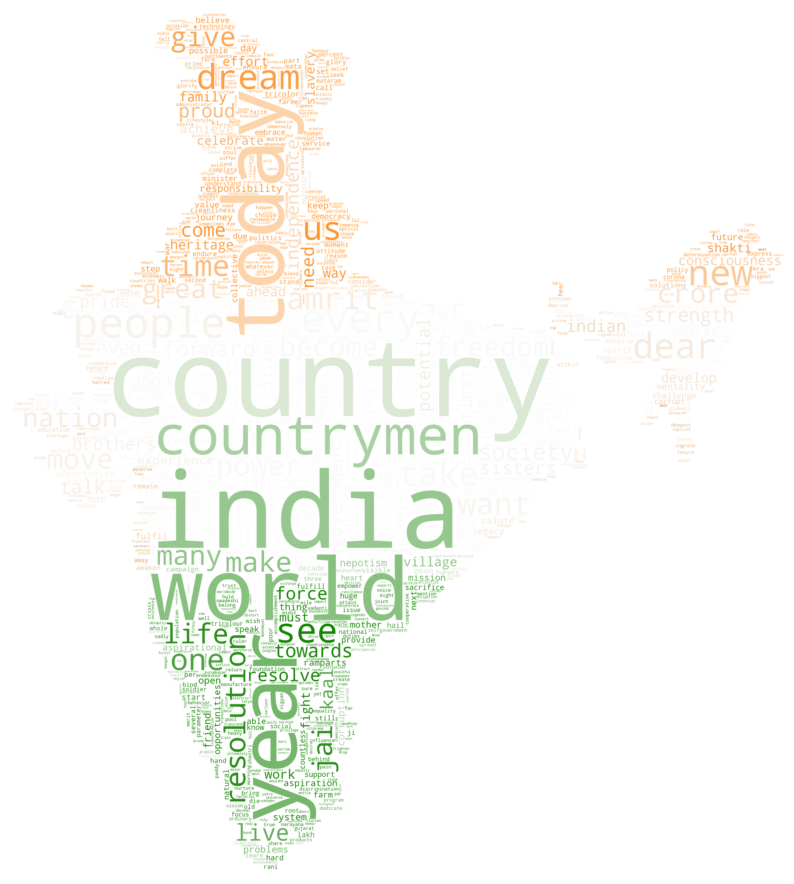

In [38]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("zero.jpg")) # pixel number
wordcloud_full = WordCloud(stopwords=stopwords,background_color='white',
                           mode="RGBA", # combination of colour
                           max_words=2700, 
                           mask=mask,
                           collocations=False).generate(ExtractedTEXT)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

## Sentiment Analysis

In [52]:
outputAnalysisDF_2022.head()

,ExtractedTEXT,polarity
0,prime minister office english render prime min...,0.160962


In [53]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
outputAnalysisDF_2022['polarity'] = outputAnalysisDF_2022['ExtractedTEXT'].apply(pol)
outputAnalysisDF_2022.head(5)

,ExtractedTEXT,polarity
0,prime minister office english render prime min...,0.160962


##### Sentiment Analysis using Vader

In [54]:
!pip install vadersentiment

Defaulting to user installation because normal site-packages is not writeable


In [55]:
outputAnalysisDF_2022.head()


,ExtractedTEXT,polarity
0,prime minister office english render prime min...,0.160962


In [56]:
outputAnalysisDF_2022.iloc[0,0]

'prime minister office english render prime minister address ramparts red fort th independence day post aug pm pib delhi best wish dear countrymen momentous occasion completion years independence many congratulations hearten see tricolor unfurl pride honor glory corner india also worldwide indians love country immensely extend heartiest congratulations people spread across globe love india heartfelt greet dear indians amrit mahotsav festival celebrate freedom day historic importance auspicious occasion step forward new path new resolution new strength pursuit independence entire period slavery spend struggle part india time period remain untouched freedom struggle several centuries slavery mark people sacrifice face torutre make supreme sacrifice today opportunity us countrymen bow salute brave hearts legends every sacrifice make every great soul opportunity also solemnly acknowledge debt pledge fulfil dream earliest deep resolve countrymen deeply indebted pujya bapu netaji subhash cha

In [57]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [58]:
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")
        
    return sentiment_dict

In [59]:
sentiment_score = sentiment_scores(outputAnalysisDF_2022.iloc[0,0])

Overall sentiment dictionary is :  {'neg': 0.074, 'neu': 0.654, 'pos': 0.272, 'compound': 1.0}
sentence was rated as  7.3999999999999995 % Negative
sentence was rated as  65.4 % Neutral
sentence was rated as  27.200000000000003 % Positive
Sentence Overall Rated As Positive


In [60]:
sentiment_score

{'neg': 0.074, 'neu': 0.654, 'pos': 0.272, 'compound': 1.0}

In [61]:
sentiment_score_df = pd.DataFrame([sentiment_score])

In [62]:
sentiment_score_df.rename(columns = {'neg':'Negative Score', 'neu':'Neutral Score',
                              'pos':'Positive Score', 'compound':'Compound Score' }, inplace = True)

In [63]:
sentiment_score_df

,Negative Score,Neutral Score,Positive Score,Compound Score
0,0.074,0.654,0.272,1.0


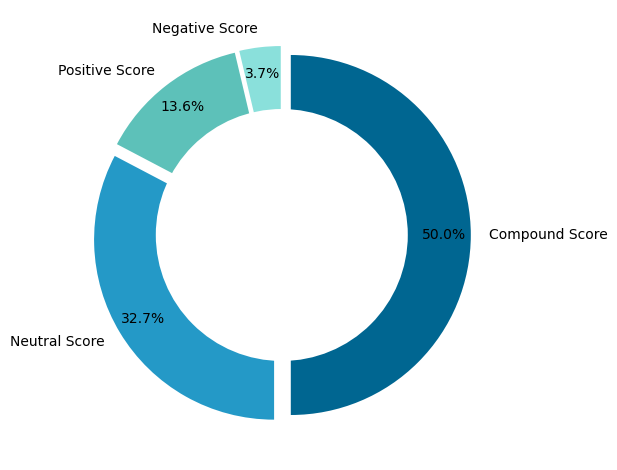

In [193]:
import matplotlib.pyplot as plt
# Pie chart
labels = ["Negative Score", "Positive Score", "Neutral Score","Compound Score"]
sizes = [0.074,0.272 , 0.654,  1.0]
#colors
colors = ['#8ae0db','#5dc1b9','#2499c7','#006691']  
#explsion
explode = (0.05,0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
  
plt.tight_layout()
plt.show()

## Analysis 2021

In [65]:
extractedTextList_2021 = []
#extractedTextList_2022 = []

extractedTextList_2021.append(extractTextFromPdf(r'2021.pdf'))
#extractedTextList_2022.append(extractTextFromPdf(r'2022.pdf'))

dataTuples_2021 = list(zip(extractedTextList_2021))
#dataTuples_2022 = list(zip(extractedTextList_2022))

outputAnalysisDF_2021 = pd.DataFrame(dataTuples_2021, columns=['ExtractedTEXT'])
#outputAnalysisDF_2022 = pd.DataFrame(dataTuples_2022, columns=['ExtractedTEXT'])

outputAnalysisDF_2021.head()

,ExtractedTEXT
0,Prime Minister's Office\nEnglish rendering of ...


In [66]:
outputAnalysisDF_2021.iloc[0,0]

"Prime Minister's Office\nEnglish rendering of the text of PM’s address from\nthe Red Fort on 75th Independence Day\nPosted On: 15 AUG 2021 1:41PM by PIB Delhi\nMy dear countrymen!\nBest wishes to all of you and those who love India and democracy from all over the world on the occasion of\nthe Amrit Mahotsav of freedom, the 75th Independence Day.\nToday, on the pious festival of the Amrit Mahotsav of freedom, the country is bowing to all its freedom\nfighters and brave heroes who continue to sacrifice themselves day and night in the defense of the nation. The\ncountry is remembering every personality, including the revered Bapu, who made freedom a mass movement,\nNetaji Subhash Chandra Bose, who sacrificed everything for the freedom, or great revolutionaries like Bhagat\nSingh, Chandrasekhar Azad, Bismil and Ashfaqulla Khan; Rani of Jhansi Lakshmibai, Queen Chennamma of\nKittur or Rani Gaidinliu or the valour of MatanginiHazra in Assam; the country's first Prime Minister Pandit\nNehru 

In [67]:
outputAnalysisDF_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ExtractedTEXT  1 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


##### Converted to Lower

In [68]:
outputAnalysisDF_2021.ExtractedTEXT=outputAnalysisDF_2021.ExtractedTEXT.str.lower()

In [69]:
outputAnalysisDF_2021.iloc[0,0]

"prime minister's office\nenglish rendering of the text of pm’s address from\nthe red fort on 75th independence day\nposted on: 15 aug 2021 1:41pm by pib delhi\nmy dear countrymen!\nbest wishes to all of you and those who love india and democracy from all over the world on the occasion of\nthe amrit mahotsav of freedom, the 75th independence day.\ntoday, on the pious festival of the amrit mahotsav of freedom, the country is bowing to all its freedom\nfighters and brave heroes who continue to sacrifice themselves day and night in the defense of the nation. the\ncountry is remembering every personality, including the revered bapu, who made freedom a mass movement,\nnetaji subhash chandra bose, who sacrificed everything for the freedom, or great revolutionaries like bhagat\nsingh, chandrasekhar azad, bismil and ashfaqulla khan; rani of jhansi lakshmibai, queen chennamma of\nkittur or rani gaidinliu or the valour of matanginihazra in assam; the country's first prime minister pandit\nnehru 

##### Remove punctuation

In [70]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [71]:
def remove_punctuation(text):
    text_nopunt="".join([c 
                         for c in text
                         if c not in string.punctuation])
    return text_nopunt

In [72]:
outputAnalysisDF_2021['ExtractedTEXT']=outputAnalysisDF_2021['ExtractedTEXT'].apply(lambda x : remove_punctuation(x))

In [73]:
outputAnalysisDF_2021.iloc[0,0]

'prime ministers office\nenglish rendering of the text of pm’s address from\nthe red fort on 75th independence day\nposted on 15 aug 2021 141pm by pib delhi\nmy dear countrymen\nbest wishes to all of you and those who love india and democracy from all over the world on the occasion of\nthe amrit mahotsav of freedom the 75th independence day\ntoday on the pious festival of the amrit mahotsav of freedom the country is bowing to all its freedom\nfighters and brave heroes who continue to sacrifice themselves day and night in the defense of the nation the\ncountry is remembering every personality including the revered bapu who made freedom a mass movement\nnetaji subhash chandra bose who sacrificed everything for the freedom or great revolutionaries like bhagat\nsingh chandrasekhar azad bismil and ashfaqulla khan rani of jhansi lakshmibai queen chennamma of\nkittur or rani gaidinliu or the valour of matanginihazra in assam the countrys first prime minister pandit\nnehru ji sardar vallabhbha

##### Remove url

In [74]:
outputAnalysisDF_2021.ExtractedTEXT=outputAnalysisDF_2021.ExtractedTEXT.str.replace(r'space','',case=False)
outputAnalysisDF_2021.iloc[0,0]

'prime ministers office\nenglish rendering of the text of pm’s address from\nthe red fort on 75th independence day\nposted on 15 aug 2021 141pm by pib delhi\nmy dear countrymen\nbest wishes to all of you and those who love india and democracy from all over the world on the occasion of\nthe amrit mahotsav of freedom the 75th independence day\ntoday on the pious festival of the amrit mahotsav of freedom the country is bowing to all its freedom\nfighters and brave heroes who continue to sacrifice themselves day and night in the defense of the nation the\ncountry is remembering every personality including the revered bapu who made freedom a mass movement\nnetaji subhash chandra bose who sacrificed everything for the freedom or great revolutionaries like bhagat\nsingh chandrasekhar azad bismil and ashfaqulla khan rani of jhansi lakshmibai queen chennamma of\nkittur or rani gaidinliu or the valour of matanginihazra in assam the countrys first prime minister pandit\nnehru ji sardar vallabhbha

##### Remove Number

In [75]:
outputAnalysisDF_2021.ExtractedTEXT=outputAnalysisDF_2021.ExtractedTEXT.str.replace('\d+', '')

In [76]:
outputAnalysisDF_2021.iloc[0,0]

'prime ministers office\nenglish rendering of the text of pm’s address from\nthe red fort on th independence day\nposted on  aug  pm by pib delhi\nmy dear countrymen\nbest wishes to all of you and those who love india and democracy from all over the world on the occasion of\nthe amrit mahotsav of freedom the th independence day\ntoday on the pious festival of the amrit mahotsav of freedom the country is bowing to all its freedom\nfighters and brave heroes who continue to sacrifice themselves day and night in the defense of the nation the\ncountry is remembering every personality including the revered bapu who made freedom a mass movement\nnetaji subhash chandra bose who sacrificed everything for the freedom or great revolutionaries like bhagat\nsingh chandrasekhar azad bismil and ashfaqulla khan rani of jhansi lakshmibai queen chennamma of\nkittur or rani gaidinliu or the valour of matanginihazra in assam the countrys first prime minister pandit\nnehru ji sardar vallabhbhai patel who i

##### Removing Stop Words

In [77]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pallavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [79]:
outputAnalysisDF_2021.iloc[0,0]

'prime ministers office\nenglish rendering of the text of pm’s address from\nthe red fort on th independence day\nposted on  aug  pm by pib delhi\nmy dear countrymen\nbest wishes to all of you and those who love india and democracy from all over the world on the occasion of\nthe amrit mahotsav of freedom the th independence day\ntoday on the pious festival of the amrit mahotsav of freedom the country is bowing to all its freedom\nfighters and brave heroes who continue to sacrifice themselves day and night in the defense of the nation the\ncountry is remembering every personality including the revered bapu who made freedom a mass movement\nnetaji subhash chandra bose who sacrificed everything for the freedom or great revolutionaries like bhagat\nsingh chandrasekhar azad bismil and ashfaqulla khan rani of jhansi lakshmibai queen chennamma of\nkittur or rani gaidinliu or the valour of matanginihazra in assam the countrys first prime minister pandit\nnehru ji sardar vallabhbhai patel who i

In [80]:
outputAnalysisDF_2021['ExtractedTEXT'] = outputAnalysisDF_2021['ExtractedTEXT'].apply(lambda x: ' '.join([word 
                                                      for word in x.split() 
                                                      if word not in (stop)]))

In [81]:
outputAnalysisDF_2021.iloc[0,0]

'prime ministers office english rendering text pm’s address red fort th independence day posted aug pm pib delhi dear countrymen best wishes love india democracy world occasion amrit mahotsav freedom th independence day today pious festival amrit mahotsav freedom country bowing freedom fighters brave heroes continue sacrifice day night defense nation country remembering every personality including revered bapu made freedom mass movement netaji subhash chandra bose sacrificed everything freedom great revolutionaries like bhagat singh chandrasekhar azad bismil ashfaqulla khan rani jhansi lakshmibai queen chennamma kittur rani gaidinliu valour matanginihazra assam countrys first prime minister pandit nehru ji sardar vallabhbhai patel integrated country united nation baba saheb ambedkar determined paved way future direction india country indebted great personalities india land endowed gems salute countless people every corner india whose names don’t even figure history built nation also ta

##### Lemmatization

In [82]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # word tokenizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pallavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [83]:
def lemmatize_text(ExtractedTEXT):
    return [lemmatizer.lemmatize(w,"v") ## v = verb  
            for w in w_tokenizer.tokenize(ExtractedTEXT)]  # word tokenizer

In [84]:
outputAnalysisDF_2021['ExtractedTEXT'] = outputAnalysisDF_2021.ExtractedTEXT.apply(lambda x :' '.join(lemmatize_text(x)))
outputAnalysisDF_2021.iloc[0,0]

'prime minister office english render text pm’s address red fort th independence day post aug pm pib delhi dear countrymen best wish love india democracy world occasion amrit mahotsav freedom th independence day today pious festival amrit mahotsav freedom country bow freedom fighters brave heroes continue sacrifice day night defense nation country remember every personality include revere bapu make freedom mass movement netaji subhash chandra bose sacrifice everything freedom great revolutionaries like bhagat singh chandrasekhar azad bismil ashfaqulla khan rani jhansi lakshmibai queen chennamma kittur rani gaidinliu valour matanginihazra assam countrys first prime minister pandit nehru ji sardar vallabhbhai patel integrate country unite nation baba saheb ambedkar determine pave way future direction india country indebted great personalities india land endow gems salute countless people every corner india whose name don’t even figure history build nation also take forward every period i

##### Strip extra whitespace

In [85]:
outputAnalysisDF_2021.iloc[0,0]

'prime minister office english render text pm’s address red fort th independence day post aug pm pib delhi dear countrymen best wish love india democracy world occasion amrit mahotsav freedom th independence day today pious festival amrit mahotsav freedom country bow freedom fighters brave heroes continue sacrifice day night defense nation country remember every personality include revere bapu make freedom mass movement netaji subhash chandra bose sacrifice everything freedom great revolutionaries like bhagat singh chandrasekhar azad bismil ashfaqulla khan rani jhansi lakshmibai queen chennamma kittur rani gaidinliu valour matanginihazra assam countrys first prime minister pandit nehru ji sardar vallabhbhai patel integrate country unite nation baba saheb ambedkar determine pave way future direction india country indebted great personalities india land endow gems salute countless people every corner india whose name don’t even figure history build nation also take forward every period i

In [86]:
outputAnalysisDF_2021['ExtractedTEXT'] = (outputAnalysisDF_2021['ExtractedTEXT'].astype("str").str.rstrip())
outputAnalysisDF_2021.iloc[0,0]

'prime minister office english render text pm’s address red fort th independence day post aug pm pib delhi dear countrymen best wish love india democracy world occasion amrit mahotsav freedom th independence day today pious festival amrit mahotsav freedom country bow freedom fighters brave heroes continue sacrifice day night defense nation country remember every personality include revere bapu make freedom mass movement netaji subhash chandra bose sacrifice everything freedom great revolutionaries like bhagat singh chandrasekhar azad bismil ashfaqulla khan rani jhansi lakshmibai queen chennamma kittur rani gaidinliu valour matanginihazra assam countrys first prime minister pandit nehru ji sardar vallabhbhai patel integrate country unite nation baba saheb ambedkar determine pave way future direction india country indebted great personalities india land endow gems salute countless people every corner india whose name don’t even figure history build nation also take forward every period i

##### Document-Term Matrix

In [87]:
outputAnalysisDF_2021.head()

,ExtractedTEXT
0,prime minister office english render text pm’s...


In [88]:
outputAnalysisDF_2021.ExtractedTEXT[0]

'prime minister office english render text pm’s address red fort th independence day post aug pm pib delhi dear countrymen best wish love india democracy world occasion amrit mahotsav freedom th independence day today pious festival amrit mahotsav freedom country bow freedom fighters brave heroes continue sacrifice day night defense nation country remember every personality include revere bapu make freedom mass movement netaji subhash chandra bose sacrifice everything freedom great revolutionaries like bhagat singh chandrasekhar azad bismil ashfaqulla khan rani jhansi lakshmibai queen chennamma kittur rani gaidinliu valour matanginihazra assam countrys first prime minister pandit nehru ji sardar vallabhbhai patel integrate country unite nation baba saheb ambedkar determine pave way future direction india country indebted great personalities india land endow gems salute countless people every corner india whose name don’t even figure history build nation also take forward every period i

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud

In [90]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # dtm = Term
outputAnalysisDF_2021_cv = cv.fit_transform(outputAnalysisDF_2021.ExtractedTEXT)  # Term & Count
outputAnalysisDF_2021_dtm = pd.DataFrame(outputAnalysisDF_2021_cv.toarray(), columns=cv.get_feature_names_out()) # document term matrix

# One of the required inputs is a term-document matrix
tdm =outputAnalysisDF_2021_dtm.transpose()
tdm

,0
abilities,2
ability,2
able,1
abolish,3
abroad,1
...,...
yojana,4
young,2
youth,9
zero,1


In [91]:
tdm['freq'] = tdm.sum(axis=1)

tdm.head()

,0,freq
abilities,2,2
ability,2,2
able,1,1
abolish,3,3
abroad,1,1


In [92]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,freq
0,abilities,2,2
1,ability,2,2
2,able,1,1
3,abolish,3,3
4,abroad,1,1


In [93]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

,Word,freq
263,country,95
599,india,80
1179,today,53
783,new,41
264,countrymen,38
...,...,...
539,harness,1
540,hassle,1
542,healthcare,1
543,healthy,1


In [94]:
tdm1.head(10)

,Word,freq
263,country,95
599,india,80
1179,today,53
783,new,41
264,countrymen,38
714,make,35
1178,time,32
1293,world,30
291,dear,26
1298,years,26


In [95]:
w = tdm1[tdm1['freq'] >30]
w

,Word,freq
263,country,95
599,india,80
1179,today,53
783,new,41
264,countrymen,38
714,make,35
1178,time,32


#### Barplot

In [96]:
import seaborn as sns

<Axes: xlabel='Word', ylabel='freq'>

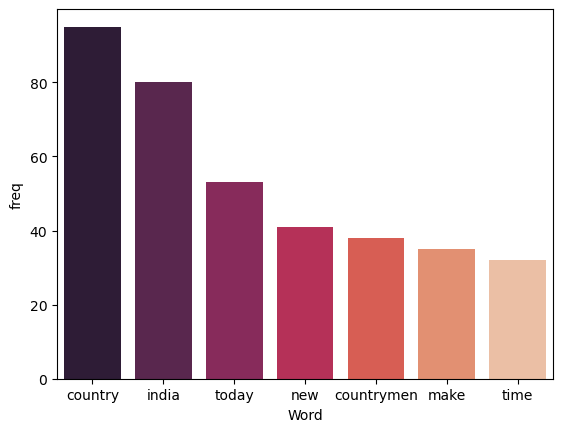

In [97]:
sns.barplot(x='Word',y='freq',
            palette='rocket',
            data=w)

#### Word Cloud

In [98]:
ExtractedTEXT = " ".join(review for review in outputAnalysisDF_2021.ExtractedTEXT)
print ("There are {} words in the combination of all review.".format(len(ExtractedTEXT)))

There are 27418 words in the combination of all review.


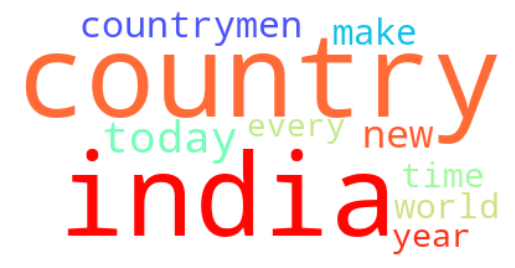

In [253]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      contour_color='#023075',contour_width=3,colormap='rainbow',
                      collocations=False,
                       max_words=10).generate(ExtractedTEXT)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Cloud Wordcloud

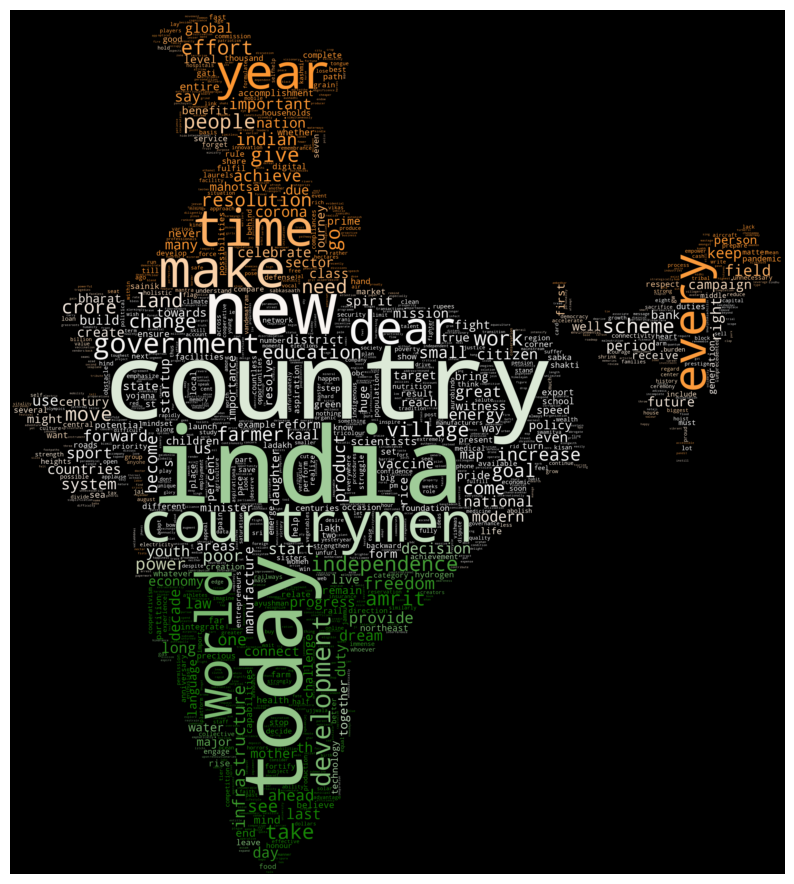

In [212]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("zero.jpg")) # pixel number
wordcloud_full = WordCloud(stopwords=stopwords,background_color='black',
                           mode="RGBA", # combination of colour
                           max_words=2700, 
                           mask=mask,
                           collocations=False).generate(ExtractedTEXT)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

#### Sentiment Analysis

In [100]:
outputAnalysisDF_2021.head()

,ExtractedTEXT
0,prime minister office english render text pm’s...


In [101]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
outputAnalysisDF_2021['polarity'] = outputAnalysisDF_2021['ExtractedTEXT'].apply(pol)
outputAnalysisDF_2021.head(5)

,ExtractedTEXT,polarity
0,prime minister office english render text pm’s...,0.121592


#### Sentiment Analysis using Vader

In [102]:
outputAnalysisDF_2021.head()


,ExtractedTEXT,polarity
0,prime minister office english render text pm’s...,0.121592


In [103]:
outputAnalysisDF_2021.iloc[0,0]

'prime minister office english render text pm’s address red fort th independence day post aug pm pib delhi dear countrymen best wish love india democracy world occasion amrit mahotsav freedom th independence day today pious festival amrit mahotsav freedom country bow freedom fighters brave heroes continue sacrifice day night defense nation country remember every personality include revere bapu make freedom mass movement netaji subhash chandra bose sacrifice everything freedom great revolutionaries like bhagat singh chandrasekhar azad bismil ashfaqulla khan rani jhansi lakshmibai queen chennamma kittur rani gaidinliu valour matanginihazra assam countrys first prime minister pandit nehru ji sardar vallabhbhai patel integrate country unite nation baba saheb ambedkar determine pave way future direction india country indebted great personalities india land endow gems salute countless people every corner india whose name don’t even figure history build nation also take forward every period i

In [104]:
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")
        
    return sentiment_dict

In [105]:
sentiment_score = sentiment_scores(outputAnalysisDF_2021.iloc[0,0])

Overall sentiment dictionary is :  {'neg': 0.052, 'neu': 0.712, 'pos': 0.236, 'compound': 1.0}
sentence was rated as  5.2 % Negative
sentence was rated as  71.2 % Neutral
sentence was rated as  23.599999999999998 % Positive
Sentence Overall Rated As Positive


In [106]:
sentiment_score

{'neg': 0.052, 'neu': 0.712, 'pos': 0.236, 'compound': 1.0}

In [107]:
sentiment_score_df = pd.DataFrame([sentiment_score])

In [108]:
sentiment_score_df.rename(columns = {'neg':'Negative Score', 'neu':'Neutral Score',
                              'pos':'Positive Score', 'compound':'Compound Score' }, inplace = True)

In [109]:
sentiment_score_df

,Negative Score,Neutral Score,Positive Score,Compound Score
0,0.052,0.712,0.236,1.0


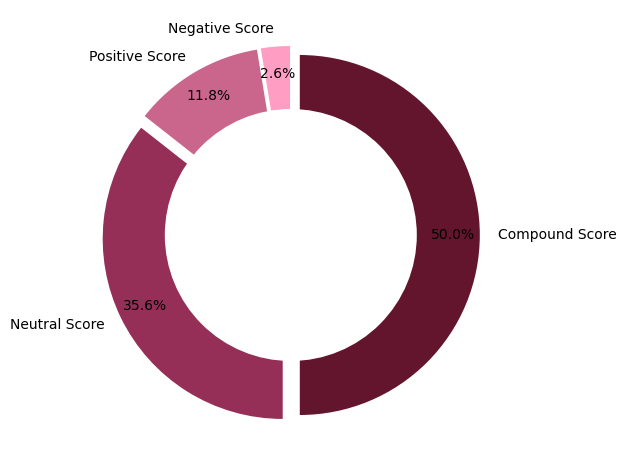

In [169]:
import matplotlib.pyplot as plt
# Pie chart
labels = ["Negative Score", "Positive Score", "Neutral Score","Compound Score"]
sizes = [0.052,0.236 ,0.712,  1.0]
#colors
colors = ['#ff9ec2','#ca668b','#952f57', '#62152d']
#explsion
explode = (0.05,0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
  
plt.tight_layout()
plt.show()

## 2021 & 2022  SENTIMENT SCORE

In [204]:
import plotly.express as px

In [205]:
data = [
[0.052,	"Negative Score","2021"],
[0.236,"Positive Score","2021"],
[0.712,	"Neutral Score","2021"],
[1,"Compound Score","2021"],
[0.074,	"Negative Score","2022"],
[0.272,	"Positive Score","2022"],
[0.654,	"Neutral Score","2022"],
[1,"Compound Score","2022"]
]
df = pd.DataFrame(data, columns =  ["Score Value", "Score Label", "Year" ] )

In [206]:
df

,Score Value,Score Label,Year
0,0.052,Negative Score,2021
1,0.236,Positive Score,2021
2,0.712,Neutral Score,2021
3,1.000,Compound Score,2021
4,0.074,Negative Score,2022
5,0.272,Positive Score,2022
6,0.654,Neutral Score,2022
7,1.000,Compound Score,2022


In [210]:
fig = px.bar(df, x="Score Label", y="Score Value", color="Year", title="Sentiment Scores",text="Score Value")
fig.show()